In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns=iris.feature_names
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 数据集划分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=45)

In [5]:
# 标准化
from sklearn.preprocessing import StandardScaler

transfer_std = StandardScaler()
x_train_std = transfer_std.fit_transform(x_train)
x_test_std = transfer_std.fit_transform(x_test)

In [6]:
# 低方差特征过滤
from sklearn.feature_selection import VarianceThreshold

transfer_var = VarianceThreshold(threshold=0.5)
x_train_std_var = transfer_var.fit_transform(x_train_std)
x_test_std_var = transfer_var.fit_transform(x_test_std)

In [7]:
# 主成分分析
from sklearn.decomposition import PCA

transfer_PCA = PCA(n_components=0.95)
x_train_std_PCA = transfer_PCA.fit_transform(x_train_std) 
x_test_std_PCA = transfer_PCA.fit_transform(x_test_std) 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(palette='pastel')
%matplotlib inline
X = x_train_std_PCA[:,0]
Y = x_train_std_PCA[:,1]

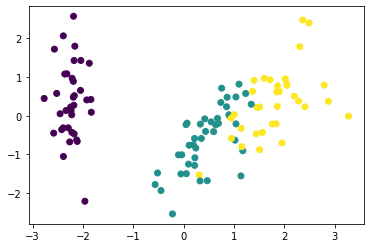

In [9]:
plt.scatter(X,Y,c=y_train)

D:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


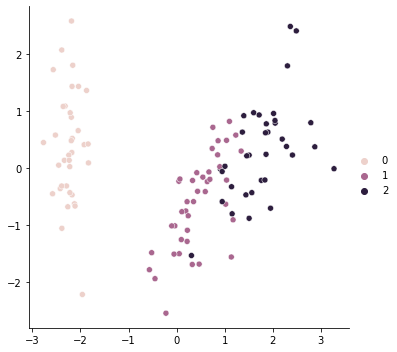

In [10]:
sns.relplot(X,Y,hue=y_train)

In [11]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

estimator_knn = KNeighborsClassifier(n_neighbors=3)
estimator_knn.fit(x_train_std_PCA,y_train)

# y_pred = estimator_knn.predict(x_test_std_PCA)

estimator_knn.score(x_test_std_PCA,y_test)


0.8947368421052632

In [12]:
X1 = x_test_std_PCA[:,0]
Y1 = x_test_std_PCA[:,1]
y_pred = estimator_knn.predict(x_test_std_PCA)

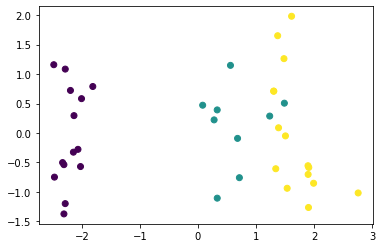

In [13]:
# 预测值
plt.scatter(X1,Y1,c=y_pred)

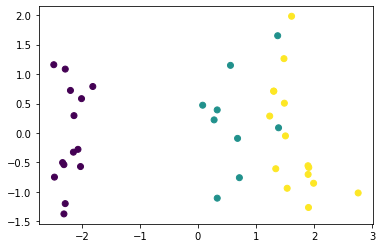

In [14]:
# 真实值
plt.scatter(X1,Y1,c=y_test)

In [15]:
# 若不进行特征工程

estimator_knn1 = KNeighborsClassifier(n_neighbors=3)
estimator_knn1.fit(x_train,y_train)

# y_pred = estimator_knn.predict(x_test_std_PCA)

estimator_knn1.score(x_test,y_test)


0.9473684210526315

In [16]:
# 若只进行标准化

estimator_knn2 = KNeighborsClassifier(n_neighbors=3)
estimator_knn2.fit(x_train_std,y_train)

# y_pred = estimator_knn.predict(x_test_std_PCA)

estimator_knn2.score(x_test_std,y_test)

0.9210526315789473

In [23]:
y_train_name=[]
for i in range(len(y_train)):
    if y_train[i]==0:
        y_train_name.append('setosa')
    elif y_train[i]==1:
         y_train_name.append('versicolor')
    else:
         y_train_name.append('virginica')

D:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


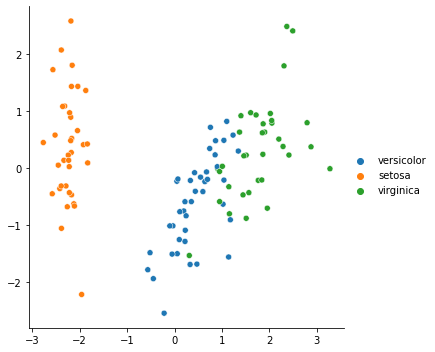

In [27]:
sns.relplot(X,Y,hue=y_train_name)

In [21]:
y_train

array([1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2,
       2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0,
       2, 2])